<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/GradientenAbstieg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quadratische Gleichung x=x² mit 1. Ableitung x=2*x (Steigung = Gradient)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x         -4 -3 -2 -1  0  1  2  3   4
y=f(x)    16  9  4  1  0  1  4  9  16
y'=f'(x)  -8 -6 -4 -2  0  2  4  6   8


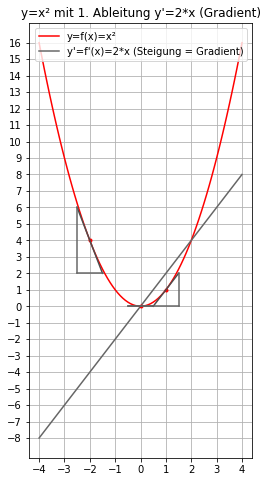

In [6]:
f = plt.figure()   # size plot
f.set_figwidth(4)
f.set_figheight(8)

def f(x):
    return x**2
def f_(x):
    return 2*x

def werteTabelle():
    x = np.arange(-4,5,1).reshape(1,9)
    y = f(x)
    y_= f_(x)
    data = np.append(x,y,axis=0)
    data = np.append(data,y_,axis=0)
    df = pd.DataFrame(data, index=['x', 'y=f(x)', 'y\'=f\'(x)'])
    print(df.to_string(header=False))

def plotSteigungsdreieck(x):
    y=f(x)
    dy=f_(x)

    plt.plot([x],[y],'r.')  # red dot
    plt.plot([x-0.5,x+0.5],[y-dy/2,y+dy/2],'0.3') # Tangente
    if(dy>=0):
        plt.plot([x-0.5,x+0.5],[y-dy/2,y-dy/2],'0.4') # delta x
        plt.plot([x+0.5,x+0.5],[y-dy/2,y+dy/2],'0.4') # delta y
    else:
        plt.plot([x-0.5,x+0.5],[y+dy/2,y+dy/2],'0.4') # delta x
        plt.plot([x-0.5,x-0.5],[y-dy/2,y+dy/2],'0.4') # delta y

werteTabelle()
x = np.arange(-4,4.01,0.1)  # numpy array arange(start,end,increment)
y = f(x)                    # Funktion x²

plt.plot(x,y,'r',label='y=f(x)=x²')
plt.title('y=x² mit 1. Ableitung y\'=2*x (Gradient)')


y = f_(x)                     # abgeleitete Funktion = Steigung
plt.plot(x,y,'0.4',label='y\'=f\'(x)=2*x (Steigung = Gradient)')


plotSteigungsdreieck(-2)
plotSteigungsdreieck(0)
plotSteigungsdreieck(1)

plt.xticks(np.linspace(-4,4,9))  # Einteilung der y-Achse
plt.yticks(np.linspace(-8,16,25))  # Einteilung der y-Achse
plt.grid()
plt.legend()

Näherungsverfahren: Gradientenabstieg

Weight:0 Delta:-4.25 Error:18.0625 Pred:0.0
Weight:0.036125 Delta:-3.9429375 Error:15.546756128906251 Pred:0.30706249999999996
Weight:0.06963996875 Delta:-3.658060265625 Error:13.381404906944447 Pred:0.591939734375
Weight:0.1007334810078125 Delta:-3.393765411433594 Error:11.517643667843032 Pred:0.8562345885664062
Weight:0.12958048700499805 Delta:-3.1485658604575164 Error:9.913466977638581 Pred:1.1014341395424834
Weight:0.15634329681888695 Delta:-2.921081977039461 Error:8.532719916584766 Pred:1.328918022960539
Weight:0.18117249362372237 Delta:-2.7100338041983596 Error:7.344283219897833 Pred:1.5399661958016402
Weight:0.20420778095940842 Delta:-2.514233861845028 Error:6.321371912048164 Pred:1.7357661381549716
Weight:0.22557876878509114 Delta:-2.3325804653267252 Error:5.440931627223842 Pred:1.9174195346732748
Weight:0.24540570274036833 Delta:-2.1640515267068694 Error:4.683119010242332 Pred:2.0859484732931306
Weight:0.26380014071737673 Delta:-2.0076988039022976 Error:4.030854487190717 Pred:

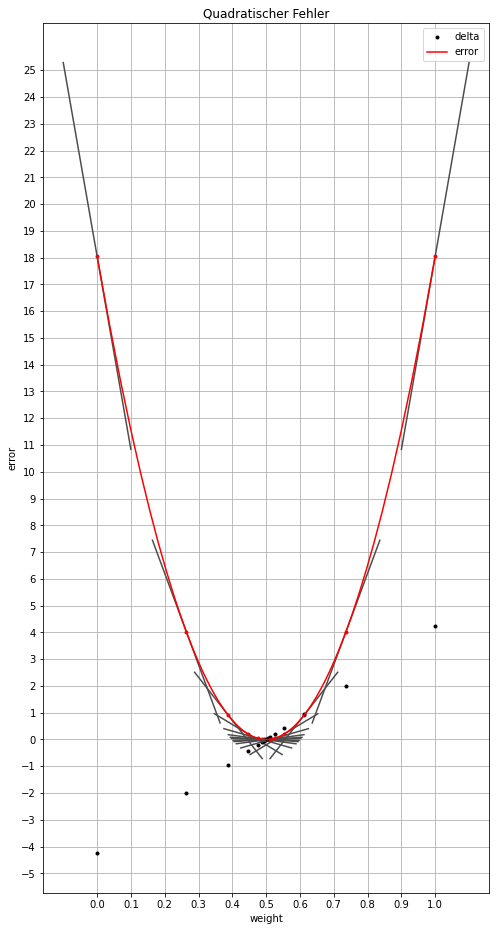

In [49]:
f = plt.figure()   # size plot
f.set_figwidth(8)
f.set_figheight(16)

goal_pred = 4.25    # Zielvorhersage => weight = 0.5
input = 8.5         # durchn. Anzahl Fusszehen pro Spieler
alpha = 0.001       # Lernrate einstellen

def plotTangente(e,w,d):
    plt.plot(w,e,'r.')
    factor = 0.2                     # begrenzt Länge der Tangente
    plt.plot([w-0.5*factor, w+0.5*factor], [e-d*factor, e+d*factor], '0.3')

def plotGraphs(startWeight):         # plot Graphen
    e=[]
    w=[]
    weight = startWeight             # Startwert
    for iteration in range(80):      # Anzahl der Durchläufe
        strOut = "Weight:" + str(weight)
        w.append(weight)
        pred = input * weight        # Voraussage
        delta = pred - goal_pred     # Abweichung bzw. Differenz vom erwarteten Ergebnis
        error = delta ** 2
        e.append(error)
        weight_delta = delta * input # Abweichung in Abhängigkeit vom Eingabewert gewichten 
        if iteration%10 == 0:        # jede 10. Iteration 
            plotTangente(error, weight, weight_delta)  # Tangente plotten
            plt.plot(weight,delta,'k.')                # Punkt plotten f'(weight) = delta
        weight = weight - weight_delta * alpha   # neues Gewicht einstellen = lernen mit eingestellter Lernrate       
        strOut += " Delta:" + str(delta) + " Error:" + str(error) + " Pred:" + str(pred)
        print(strOut)
    plt.plot(w,e,'r')                # Quadratischen Fehler plotten
    
plt.plot([],[],'k.',label='delta')
plt.plot([],[],'r',label='error')

plotGraphs(0)    # von links mit weight=0 annähern 
plotGraphs(1)    # von rechts mit weight=0 annähern 
plt.xticks(np.linspace(0,1,11))   # Einteilung der x-Achse
plt.yticks(np.linspace(-5,25,31))  #                y-Achse
plt.grid(True)

plt.title('Quadratischer Fehler')
plt.xlabel('weight')
plt.ylabel('error')
plt.legend()
